# Solving 2D Truss Problems with Python: An Object-Oriented Approach

## Introduction

In the realm of structural engineering, trusses play a crucial role in supporting various architectural and engineering structures. Analyzing the behavior of these trusses under different loading conditions is essential for ensuring their stability and safety. To streamline this process, engineers often turn to computational tools. One such tool is a Python script I have developed, leveraging object-oriented programming principles to solve 2D truss problems efficiently.

## Object-Oriented Design

The core of the script revolves around object-oriented design principles. I structured the codebase around classes representing different elements of the truss system, such as joints, members, and trusses. Each class encapsulates relevant data and functionality, promoting modularity and code reusability.

## Easy Setup

Using the script is straightforward. Users can define the truss geometry by specifying node coordinates and connecting them with elements. Additionally, they can apply loads and constraints at specified nodes. This intuitive setup process allows engineers to model complex truss configurations with ease.

## Efficient Solver

The script employs numerical methods to solve the equilibrium equations governing the truss system. By utilizing the direct stiffness matrix method [(background theory)](https://www.degreetutors.com/direct-stiffness-method/), it accurately determines the internal forces and displacements within the truss. This computational approach enables engineers to analyze truss behavior under various loading scenarios efficiently through Gaussian Elimination.

## Visualization Capabilities

Visualizing the results is crucial for understanding the structural response of the truss. Therefore, the script incorporates visualization capabilities using libraries like Matplotlib. Engineers can generate clear and informative plots illustrating the deformed shape, internal forces, and reactions within the truss. These visualizations aid in interpreting the analysis results and making informed design decisions.

## Flexibility and Extensibility

One of the key advantages of the script is its flexibility and extensibility. Engineers can easily modify parameters such as material properties, section properties, and loading conditions to study different design scenarios. Furthermore, the modular nature of the code allows for straightforward integration of additional functionalities or enhancements, catering to diverse engineering requirements.

## Conclusion
In summary, the Python script I have developed provides a powerful and versatile tool for solving 2D truss problems. By leveraging object-oriented programming principles, efficient numerical methods, and visualization capabilities, it empowers engineers to analyze truss structures effectively and make informed design decisions. As computational tools continue to evolve, such scripts play a vital role in advancing the field of structural engineering.

## Next Steps

1. Refinement and Validation

   As with any computational tool, it's essential to continually refine and validate the script's performance against analytical solutions or experimental data. Conducting validation studies ensures the accuracy and reliability of the results, instilling confidence in the tool's capabilities. Engineers should seek to refine algorithms, improve numerical stability, and address any identified limitations or edge cases.

2. Optimization and Performance Enhancement

   Enhancing the efficiency and performance of the script is crucial, particularly for analyzing large and complex truss structures. Optimization techniques such as algorithmic improvements, parallel processing, and memory management can significantly reduce computation time and resource utilization. Striving for optimal performance ensures that engineers can conduct analyses swiftly and effectively.

3. Extension to Frames

   Building upon the foundation laid by the 2D truss solver, the natural progression is to extend the script's capabilities to analyze 2D frames. Frames introduce additional complexities such as bending moments and shear forces, necessitating the integration of more advanced structural analysis techniques. By incorporating frame elements and appropriate mathematical formulations, engineers can broaden the scope of the tool to encompass a wider range of structural systems.

4. Development of 3D Structural Analysis

   The transition from 2D to 3D structures opens up a plethora of new challenges and opportunities. Extending the script to analyze 3D trusses and frames involves handling spatial relationships, additional degrees of freedom, and complex load distributions. Implementing 3D structural analysis algorithms, such as the finite element method (FEM) or matrix structural analysis, enables engineers to tackle the intricacies of three-dimensional structural behavior. This expansion allows for more comprehensive and realistic simulations of real-world structures, facilitating advanced design and optimization studies.

5. User Interface Development

   While the current script operates primarily through code input, developing a graphical user interface (GUI) can enhance usability and accessibility. A GUI-based interface provides intuitive controls for defining geometry, applying loads, and visualizing results, catering to a broader audience, including less experienced users. Additionally, integrating interactive features such as parameter sliders and real-time plotting enhances the user experience and facilitates iterative design exploration.

6. Collaborative Development and Community Engagement

   Encouraging collaboration and community engagement fosters the exchange of ideas, feedback, and contributions, driving the continuous improvement of the script. Establishing an open-source repository, hosting discussions, and soliciting contributions from fellow engineers and developers enriches the tool's functionality and ensures its relevance to evolving industry needs. By fostering a collaborative ecosystem, engineers can collectively advance the state-of-the-art in computational structural analysis.

Incorporating these next steps into the development roadmap ensures the continual evolution and enhancement of the Python script for solving 2D truss problems, laying the groundwork for tackling more complex structural systems and advancing the field of structural engineering.

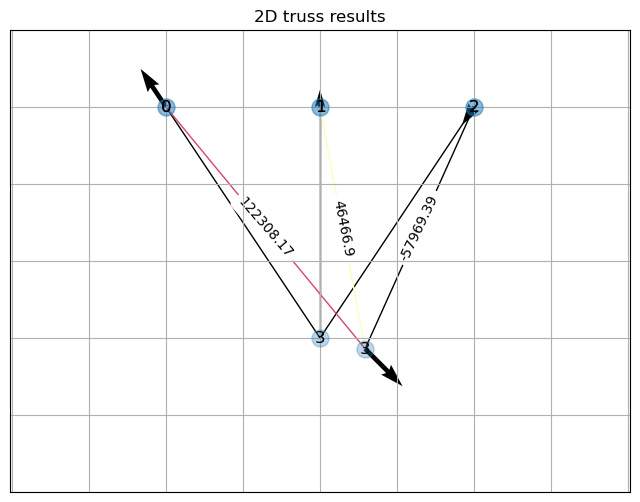

In [2]:
from graph import Nodes, Edges
from truss import Joint, Member, Truss
import numpy as np
from analysis import draw
import matplotlib.pyplot as plt

# Create objects of the joints
j0 = Joint(coordinates=np.array([0,0]), key='0')
j1 = Joint(coordinates=np.array([4,0]), key='1')
j2 = Joint(coordinates=np.array([8,0]), key='2')
j3 = Joint(coordinates=np.array([4,-6]), external_forces=np.array([1.e5, -1.e5]), degrees_of_freedom=np.array([1,1]), key='3')

# Create objects for the truss members
m0 = Member(tail=j0, head=j3, youngs_modulus=2.e11, area=5.e-3, key='A')
m1 = Member(tail=j1, head=j3, youngs_modulus=2.e11, area=5.e-3, key='B')
m2 = Member(tail=j2, head=j3, youngs_modulus=2.e11, area=5.e-3, key='C')

# Assemble joints and members into a truss object
truss = Truss(
	nodes=Nodes(j0, j1, j2, j3),
	edges=Edges(m0, m1, m2)
)

# Solve the truss
truss.solve()

# Get the original and displaced coordinates
coordinates = truss.nodes.get('coordinates')
scale = 1000
displaced_coordinates = coordinates + scale*truss.nodes.get('displacement')

# Get the nodal position
pos = dict(zip(truss.nodes, coordinates))

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('2D truss results')
ax.grid()

# Draw a simple plot of the truss
draw(graph=truss, ax=ax, pos=pos, nlbl='key', eshow=True, elbl=None)

# Get the nodal position
pos = dict(zip(truss.nodes, displaced_coordinates))

# Draw a simple plot of the truss
draw(graph=truss, ax=ax, pos=pos, nlbl='key', eshow=True, elbl='member_force', edecs=2)

# Draw vectors
ax.quiver(*displaced_coordinates.T, *(truss.nodes.get('reaction_forces')).T)

# Set our limits to view the acting vector
ax.set_ylim(-10,2)
plt.show()

We can display this data in pandas too.

In [12]:
import pandas as pd
from IPython.display import display

data = {
    'Name': truss.nodes.get('name'),
    'X': truss.nodes.get('coordinates').T[0],
    'Y': truss.nodes.get('coordinates').T[1],
    'X-dof': truss.nodes.get('degrees_of_freedom').T[0],
    'Y-dof': truss.nodes.get('degrees_of_freedom').T[1],
    'Fext-x': truss.nodes.get('external_forces').T[0],
    'Fext-y': truss.nodes.get('external_forces').T[1],
    'Freac-x': truss.nodes.get('reaction_forces').T[0],
    'Freac-y': truss.nodes.get('reaction_forces').T[1],
}
df = pd.DataFrame(data)
display(df.round())

,Name,X,Y,X-dof,Y-dof,Fext-x,Fext-y,Freac-x,Freac-y
0,Joint,8,0,0.0,0.0,0.0,0.0,-32156.0,-48233.0
1,Joint,0,0,0.0,0.0,0.0,0.0,-67844.0,101767.0
2,Joint,4,-6,1.0,1.0,100000.0,-100000.0,100000.0,-100000.0
3,Joint,4,0,0.0,0.0,0.0,0.0,-0.0,46467.0
